In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [112]:
data=pd.read_csv('Canadian Anti-Fraud Centre Fraud - Canadian Anti-Fraud Centre Frau.csv')

data.head()
print(data.dtypes)


Numero d'identification / Number ID                             int64
Date Received / Date recue                                     object
Complaint Received Type                                        object
Type de plainte recue                                          object
Country                                                        object
Pays                                                           object
Province/State                                                 object
Province/Etat                                                  object
Fraud and Cybercrime Thematic Categories                       object
Categories thematiques sur la fraude et la cybercriminalite    object
Solicitation Method                                            object
Methode de sollicitation                                       object
Gender                                                         object
Genre                                                          object
Language of Correspo

In [114]:

def data_cleaning_4_raw(data):
    # English Column Extract
    data = data[[
        "Numero d'identification / Number ID",
        'Date Received / Date recue',
       'Complaint Received Type', 'Country', 'Pays',
       'Province/State',
       'Fraud and Cybercrime Thematic Categories',
       'Solicitation Method', 'Gender','Language of Correspondence',
       "Victim Age Range / Tranche d'age des victimes", 'Complaint Type',
       'Number of Victims / Nombre de victimes',
       'Dollar Loss /pertes financieres']]

    # Rename columns' name in english
    data.rename(columns={
        "Numero d'identification / Number ID":"Number_ID",
        'Date Received / Date recue':"Date_Received",
        'Fraud and Cybercrime Thematic Categories':"Fraud_and_Cybercrime_Thematic_Categories",
        "Victim Age Range / Tranche d'age des victimes":"Victim_Age_Range",
        'Number of Victims / Nombre de victimes':'Number_of_Victims',
        'Dollar Loss /pertes financieres':'Dollar_Loss',
        }, inplace=True)

    # Get Canada's Data only
    data.query('"Canada" in Country', inplace=True)
    # Remove Provence = 'California':
    data = data[data['Province/State']!= "California"]
    data.reset_index(inplace=True, drop=True)

    # Columns' type modify
    data['Dollar_Loss'] = data['Dollar_Loss'].map(lambda x: float(re.sub('[$,]','',x)))
    data['Date_Received'] = pd.to_datetime(data['Date_Received'])


    data[data['Province/State'] != 'California']
    return data

# Here is the sample of how you can use it.
clean_data = data_cleaning_4_raw(data)

/var/folders/qh/h818hm851ln4ccffmg5hn54w0000gn/T/ipykernel_4206/3070512719.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/qh/h818hm851ln4ccffmg5hn54w0000gn/T/ipykernel_4206/3070512719.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/qh/h818hm851ln4ccffmg5hn54w0000gn/T/ipykernel_4206/3070512719.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

In [116]:
clean_data['Complaint Type'].unique()

array(['Attempt', 'Victim', 'Other', 'Unknown', 'Incomplete'],
      dtype=object)

In [118]:
clean_data.head()
clean_data.set_index('Date_Received', inplace=True)

In [120]:
clean_data

,Number_ID,Complaint Received Type,Country,Pays,Province/State,Fraud_and_Cybercrime_Thematic_Categories,Solicitation Method,Gender,Language of Correspondence,Victim_Age_Range,Complaint Type,Number_of_Victims,Dollar_Loss
Date_Received,,,,,,,,,,,,,
2021-01-02,1,CAFC Website,Canada,Canada,Saskatchewan,Merchandise,Other/unknown,Not Available,Not Available,'Not Available / non disponible,Attempt,0,0.00
2021-01-02,3,CAFC Website,Canada,Canada,Quebec,Identity Fraud,Other/unknown,Male,French,'40 - 49,Victim,1,0.00
2021-01-02,4,CAFC Website,Canada,Canada,Saskatchewan,Phishing,Email,Male,English,'30 - 39,Victim,1,0.00
2021-01-02,5,CAFC Website,Canada,Canada,Saskatchewan,Merchandise,Other/unknown,Male,Not Available,'60 - 69,Victim,1,222.73
2021-01-02,6,CAFC Website,Canada,Canada,Ontario,Phishing,Text message,Male,English,'30 - 39,Attempt,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-28,285849,Phone,Canada,Canada,Ontario,Bank Investigator,Direct call,Female,English,'50 - 59,Victim,1,42908.00
2024-06-28,285850,Phone,Canada,Canada,Ontario,Service,Internet-social network,Male,English,'30 - 39,Victim,1,0.00
2024-06-28,285851,Phone,Canada,Canada,Quebec,Service,Internet,Male,French,'60 - 69,Victim,1,0.00


In [122]:
df = data_cleaning_4_raw(data)
print(data.dtypes)


Numero d'identification / Number ID                             int64
Date Received / Date recue                                     object
Complaint Received Type                                        object
Type de plainte recue                                          object
Country                                                        object
Pays                                                           object
Province/State                                                 object
Province/Etat                                                  object
Fraud and Cybercrime Thematic Categories                       object
Categories thematiques sur la fraude et la cybercriminalite    object
Solicitation Method                                            object
Methode de sollicitation                                       object
Gender                                                         object
Genre                                                          object
Language of Correspo

/var/folders/qh/h818hm851ln4ccffmg5hn54w0000gn/T/ipykernel_4206/3070512719.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/qh/h818hm851ln4ccffmg5hn54w0000gn/T/ipykernel_4206/3070512719.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/qh/h818hm851ln4ccffmg5hn54w0000gn/T/ipykernel_4206/3070512719.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

In [124]:
# Remove any non-numeric characters
clean_data['Dollar_Loss'] = clean_data['Dollar_Loss'].replace({'$': '', ',': ''}, regex=True)

# Convert the column to numeric, forcing any non-convertible values to NaN
clean_data['Dollar_Loss'] = pd.to_numeric(clean_data['Dollar_Loss'], errors='coerce')

# Check for NaN values
print(clean_data['Dollar_Loss'].isna().sum())




0


## Financial Analysis:

### Financial analysis by Gender:

Data Exploration

In [126]:
print(clean_data['Dollar_Loss'].describe())


count    2.163450e+05
mean     6.317350e+03
std      1.007662e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.361500e+07
Name: Dollar_Loss, dtype: float64


In [128]:
gender_loss = clean_data.groupby('Gender')['Dollar_Loss'].mean().reset_index()
print(gender_loss)

              Gender   Dollar_Loss
0             Female   4599.584650
1               Male   6253.400837
2      Not Available  14758.530669
3              Other   1533.931863
4  Prefer not to say   2258.122010
5            Unknown   7273.398565


/var/folders/qh/h818hm851ln4ccffmg5hn54w0000gn/T/ipykernel_4206/415677843.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




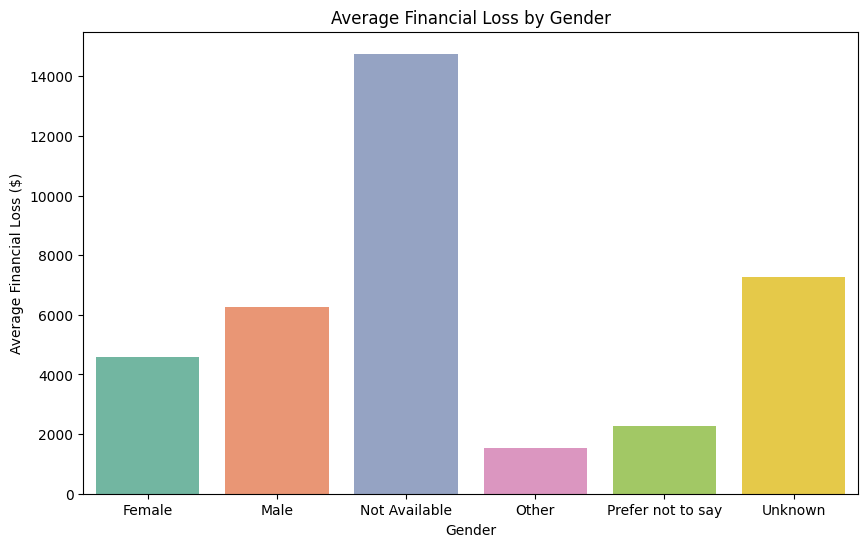

In [170]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='Dollar_Loss', data=gender_loss,palette='Set2')  # Using a predefined color palette
plt.title('Average Financial Loss by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Financial Loss ($)')
plt.show()


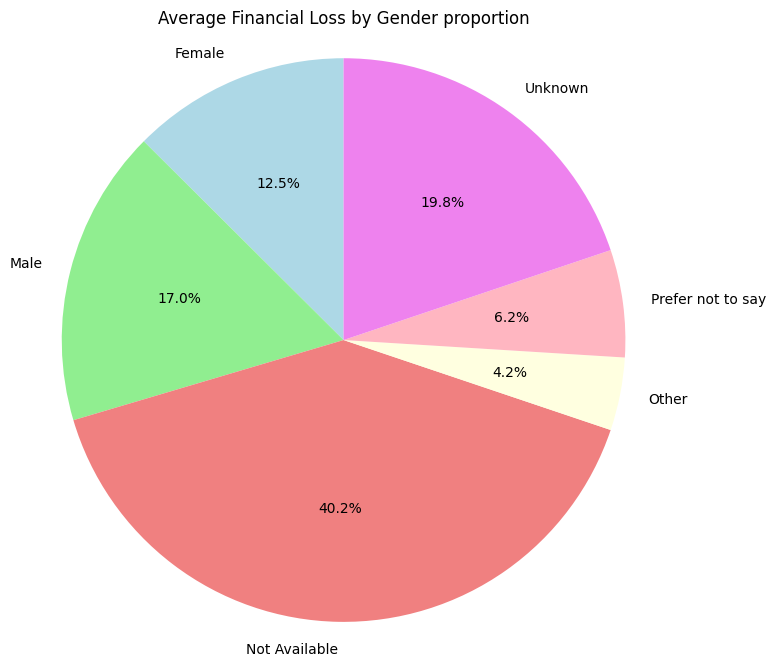

In [159]:

# Prepare data for the pie chart
labels = gender_loss['Gender']
sizes = gender_loss['Dollar_Loss']

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'lightcoral','lightyellow','lightpink','violet'])
plt.title('Average Financial Loss by Gender proportion')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

From the above finding, The proportion of male is more compared to other genders. Also the dollar loss is more for male, 6253 dollars on an average.

# Province anaylsis:

In [132]:
province_id= clean_data['Province/State'].unique()

In [134]:
province_id

array(['Saskatchewan', 'Quebec', 'Ontario', 'British Columbia', 'Yukon',
       'Alberta', 'Manitoba', 'Prince Edward Island',
       'Newfoundland And Labrador', 'Nova Scotia', 'New Brunswick',
       'Not Specified', 'North West Territories', 'Nunavut'], dtype=object)

In [138]:
province_loss = clean_data.groupby('Province/State')['Dollar_Loss'].mean().reset_index().sort_values(by='Dollar_Loss',ascending=False)

In [140]:
province_loss

,Province/State,Dollar_Loss
1,British Columbia,8705.023650
9,Ontario,8103.913469
2,Manitoba,7750.831276
0,Alberta,7481.739015
5,North West Territories,6192.531242
8,Nunavut,6078.672289
12,Saskatchewan,5714.541442
4,Newfoundland And Labrador,4478.600804
6,Not Specified,4473.498767
3,New Brunswick,4187.285279


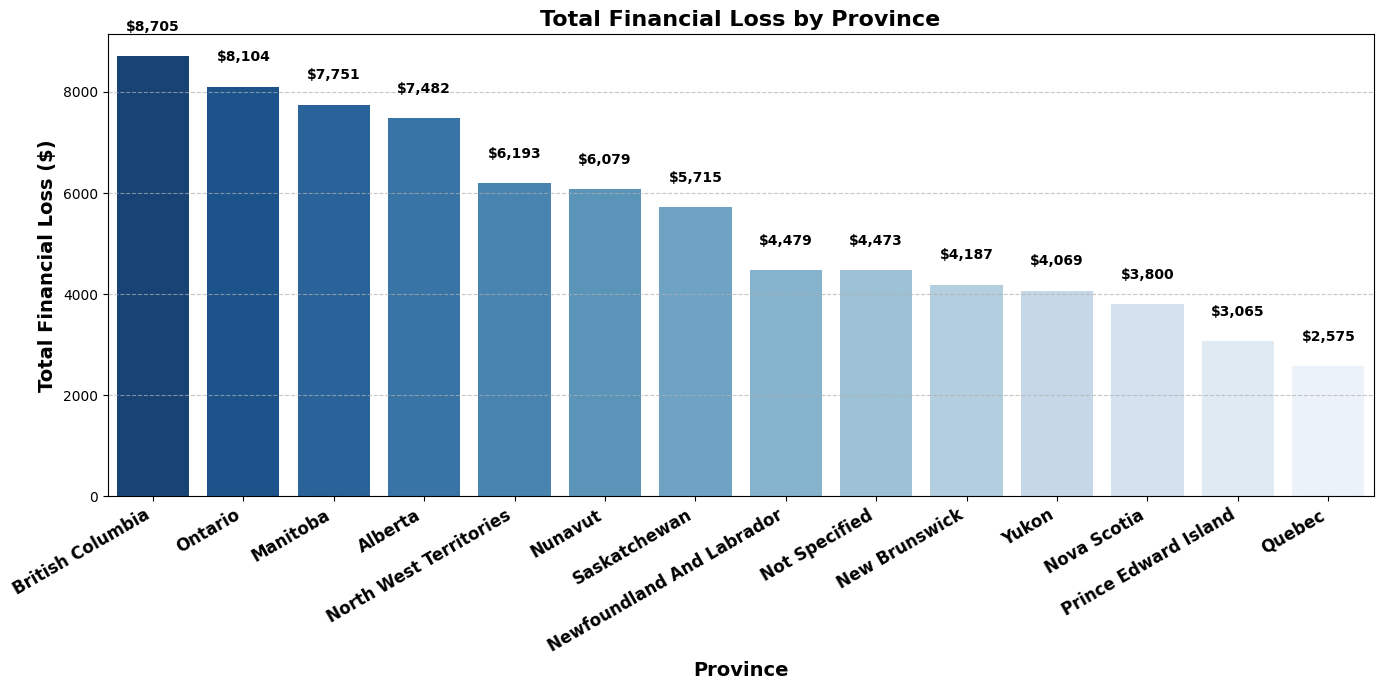

In [142]:

plt.figure(figsize=(14, 7))

palette = sns.color_palette("Blues_r", len(province_loss))

sns.barplot(x='Province/State', y='Dollar_Loss', hue='Province/State', data=province_loss, palette=palette, dodge=False)
plt.legend([],[], frameon=False)  

plt.title('Total Financial Loss by Province', fontsize=16, fontweight='bold')
plt.xlabel('Province', fontsize=14, fontweight='bold')
plt.ylabel('Total Financial Loss ($)', fontsize=14, fontweight='bold')


plt.xticks(rotation=30, ha='right', fontsize=12, fontweight='bold')  


plt.gca().patch.set_facecolor('white')  
bars = plt.gca().patches
for bar in bars:
    bar.set_width(0.8)  

for index, value in enumerate(province_loss['Dollar_Loss']):
    plt.text(index, value + 500, f'${value:,.0f}', ha='center', fontsize=10, color='black', fontweight='bold')


plt.grid(True, axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()

plt.show()




From the above findings, on an average, the british columbia, is the one who is highly affected while the surprising thing is quebec which has lowest although they have many industry and a big population.

In [71]:
age_range= clean_data['Victim_Age_Range'].unique()

In [73]:
age_range

array(["'Not Available / non disponible", "'40 - 49", "'30 - 39",
       "'60 - 69", "'70 - 79", "'10 - 19", "'20 - 29", "'50 - 59",
       "'80 - 89", "'1 - 9", "'Deceased / Décédé", "'90 - 99", "'100 +",
       "'Business / Entreprise"], dtype=object)

In [75]:
age_range_id = clean_data.groupby('Victim_Age_Range')['Dollar_Loss'].mean().reset_index()
age_range_id

,Victim_Age_Range,Dollar_Loss
0,'1 - 9,1302.578562
1,'10 - 19,625.572225
2,'100 +,1925.905192
3,'20 - 29,1750.199283
4,'30 - 39,3067.813363
5,'40 - 49,5815.443867
6,'50 - 59,8434.209976
7,'60 - 69,8162.885312
8,'70 - 79,7647.480442
9,'80 - 89,5783.455192


In [104]:

unwanted_categories = [
    "'1 - 9",  
    "'Business / Entreprise",
    "'Deceased / Décédé",
    
]

# Filter out unwanted categories using multiple conditions
filtered_age_range = age_range_id[
    ~age_range_id['Victim_Age_Range'].isin(unwanted_categories)
]
filtered_age_range

#filter the data

,Victim_Age_Range,Dollar_Loss
1,'10 - 19,625.572225
2,'100 +,1925.905192
3,'20 - 29,1750.199283
4,'30 - 39,3067.813363
5,'40 - 49,5815.443867
6,'50 - 59,8434.209976
7,'60 - 69,8162.885312
8,'70 - 79,7647.480442
9,'80 - 89,5783.455192
10,'90 - 99,3404.891505


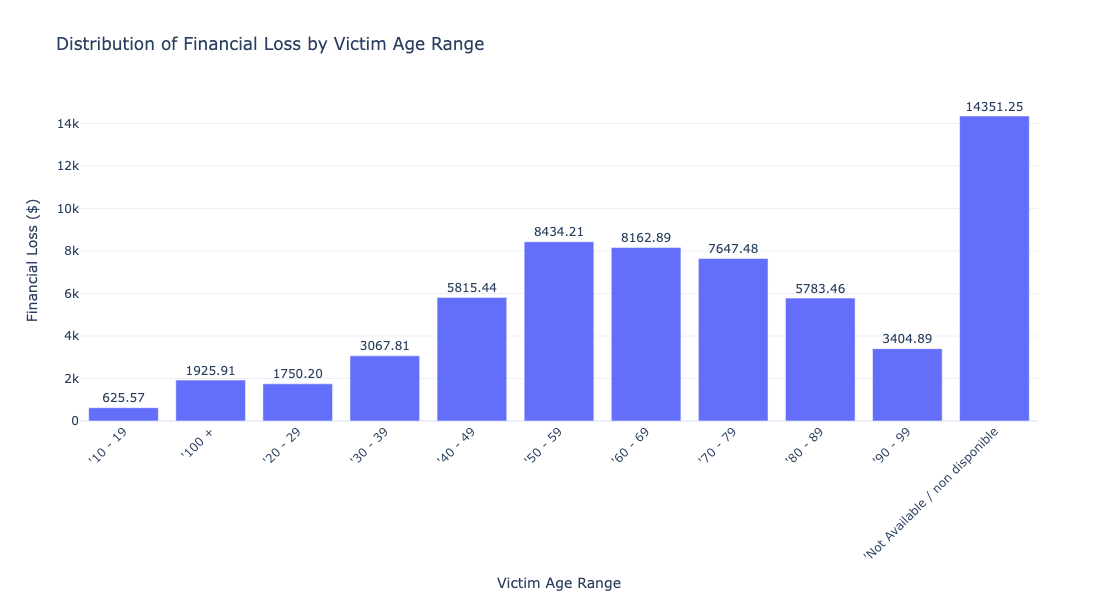

In [174]:
import plotly.express as px

fig = px.bar(
    filtered_age_range,
    x='Victim_Age_Range',
    y='Dollar_Loss',
    title='Distribution of Financial Loss by Victim Age Range',
    labels={'Victim_Age_Range': 'Victim Age Range', 'Dollar_Loss': 'Financial Loss ($)'},
    text='Dollar_Loss'  
)


fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')  
fig.update_layout(
    xaxis_title='Victim Age Range',
    yaxis_title='Financial Loss ($)',
    xaxis_tickangle=-45,  
    template='plotly_white' 
)
fig.update_layout(
    width=800,  # Set the width of the plot
    height=600,  # Set the height of the plot
    
)


fig.show()

In [ ]:
From the above findings, we can see for age 50-59 on an average each person loss is appor 8500 dollars, which was expected as they may have less 
knowledge about the current scams going on.